## *Read Data:*

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
def clean_csv(csv, index):
    '''
    Reads in a csv file and sets index column.
    
    Inputs:
        csv (str): csv filename
        index (str): column string of index

    Returns:
        dataframe
    '''
    return pd.read_csv(csv, index_col=index)

## *Explore Data:*

In [6]:
credit = pd.read_csv("credit-data.csv", index_col='PersonID')

In [7]:
credit.isnull().sum()

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
zipcode                                    0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           7974
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1037
dtype: int64

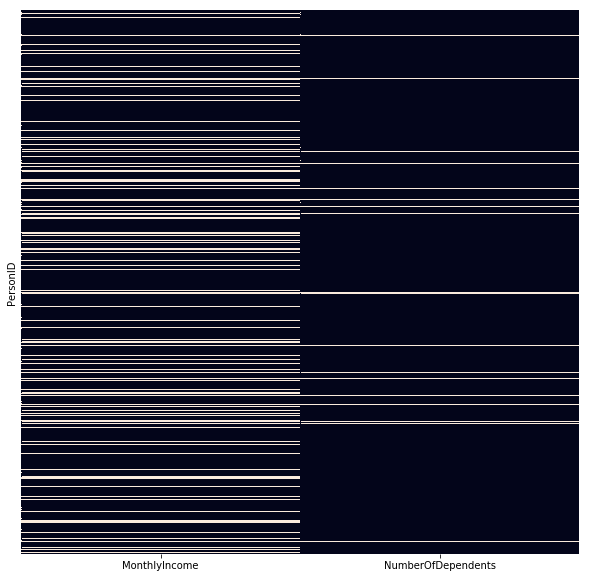

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(credit[credit.columns[credit.isnull().any()].tolist()].isnull(), 
            yticklabels=False, cbar=False)

plt.show()

In [6]:
cm = credit.corr().fillna(0)

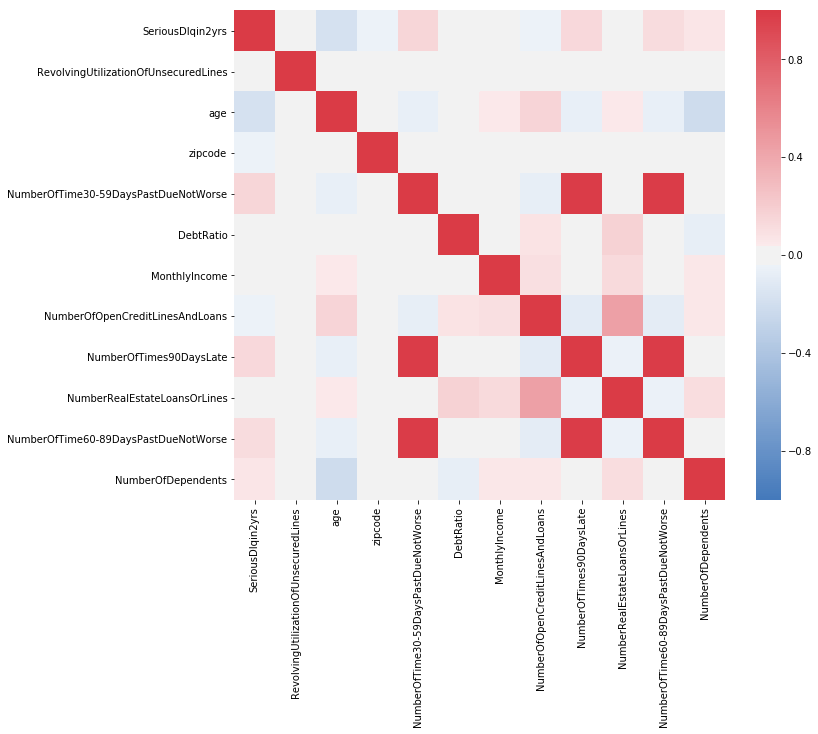

In [19]:
create_heatmap(credit, (11,9))

In [18]:
def create_heatmap(dataframe, size):
    '''
    Creates and saves a heatmap as a file, given a dataframe, desired size,
    and columns to generate a matrix of correlations
    Inputs:
        dataframe (dataframe): a dataframe
        corr_columns (list): list of column names
        size (tuple): tuple of width, height (ints)
        filename (string): string of desired filename
    Returns:
        None
    '''

    corr_matrix = dataframe.corr().fillna(0)
    x, y = size
    png, ax = plt.subplots(figsize=(x,y))

    ax = sns.heatmap(corr_matrix, center=0, vmin= -1, vmax=1, cmap=sns.diverging_palette(250, 10,
                                                                  as_cmap=True))

    return plt.show()

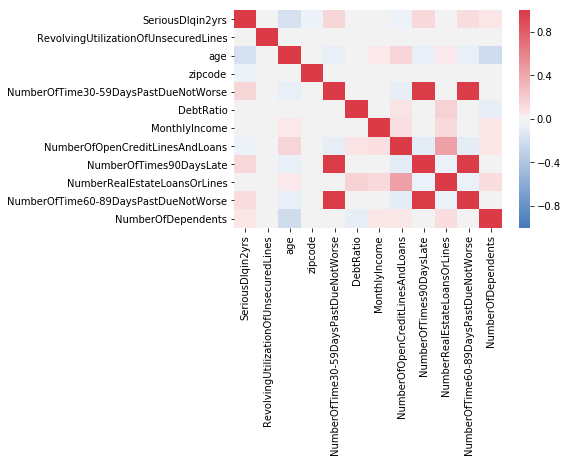

In [7]:
sns.heatmap(cm, center=0, vmin= -1, vmax=1, cmap=sns.diverging_palette(250, 10, as_cmap=True))
plt.show()

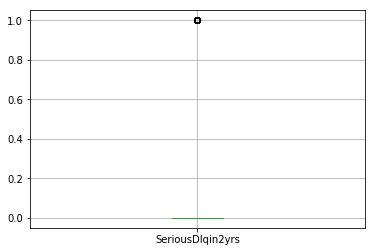

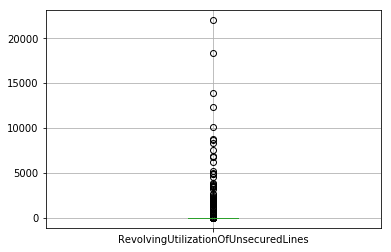

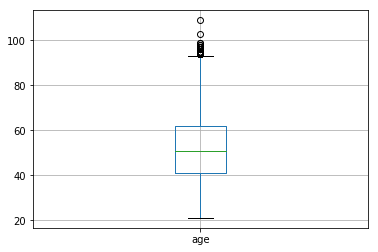

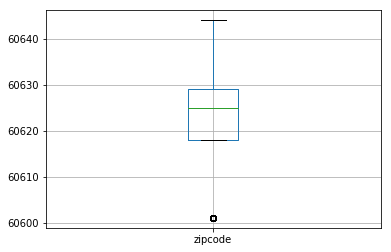

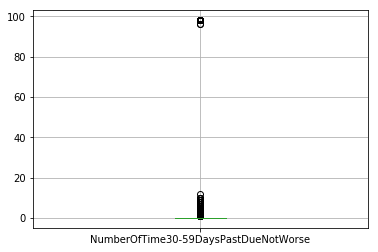

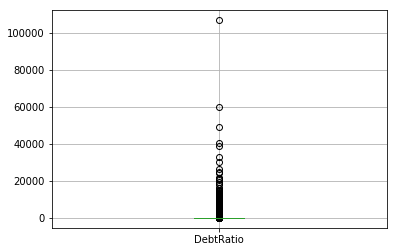

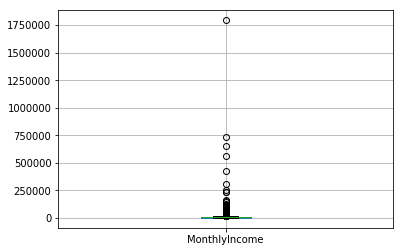

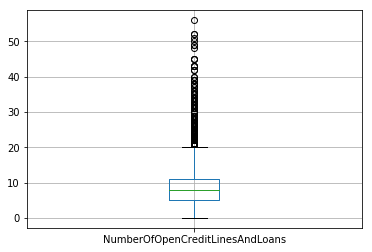

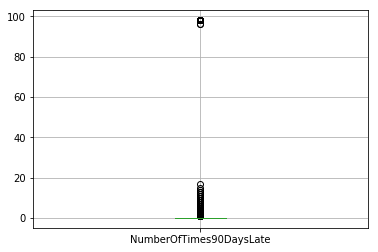

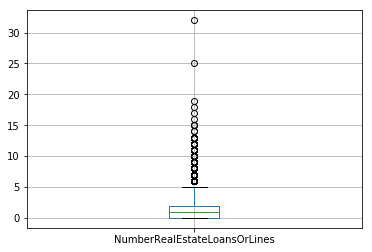

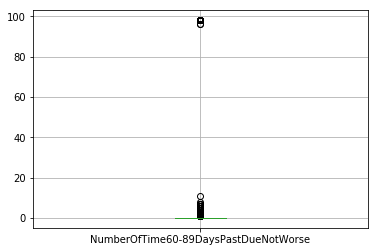

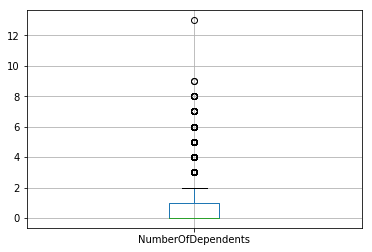

In [24]:
for col in credit.columns:
    credit.boxplot(column=col)
    plt.show()

In [21]:
type(credit.describe())

pandas.core.frame.DataFrame

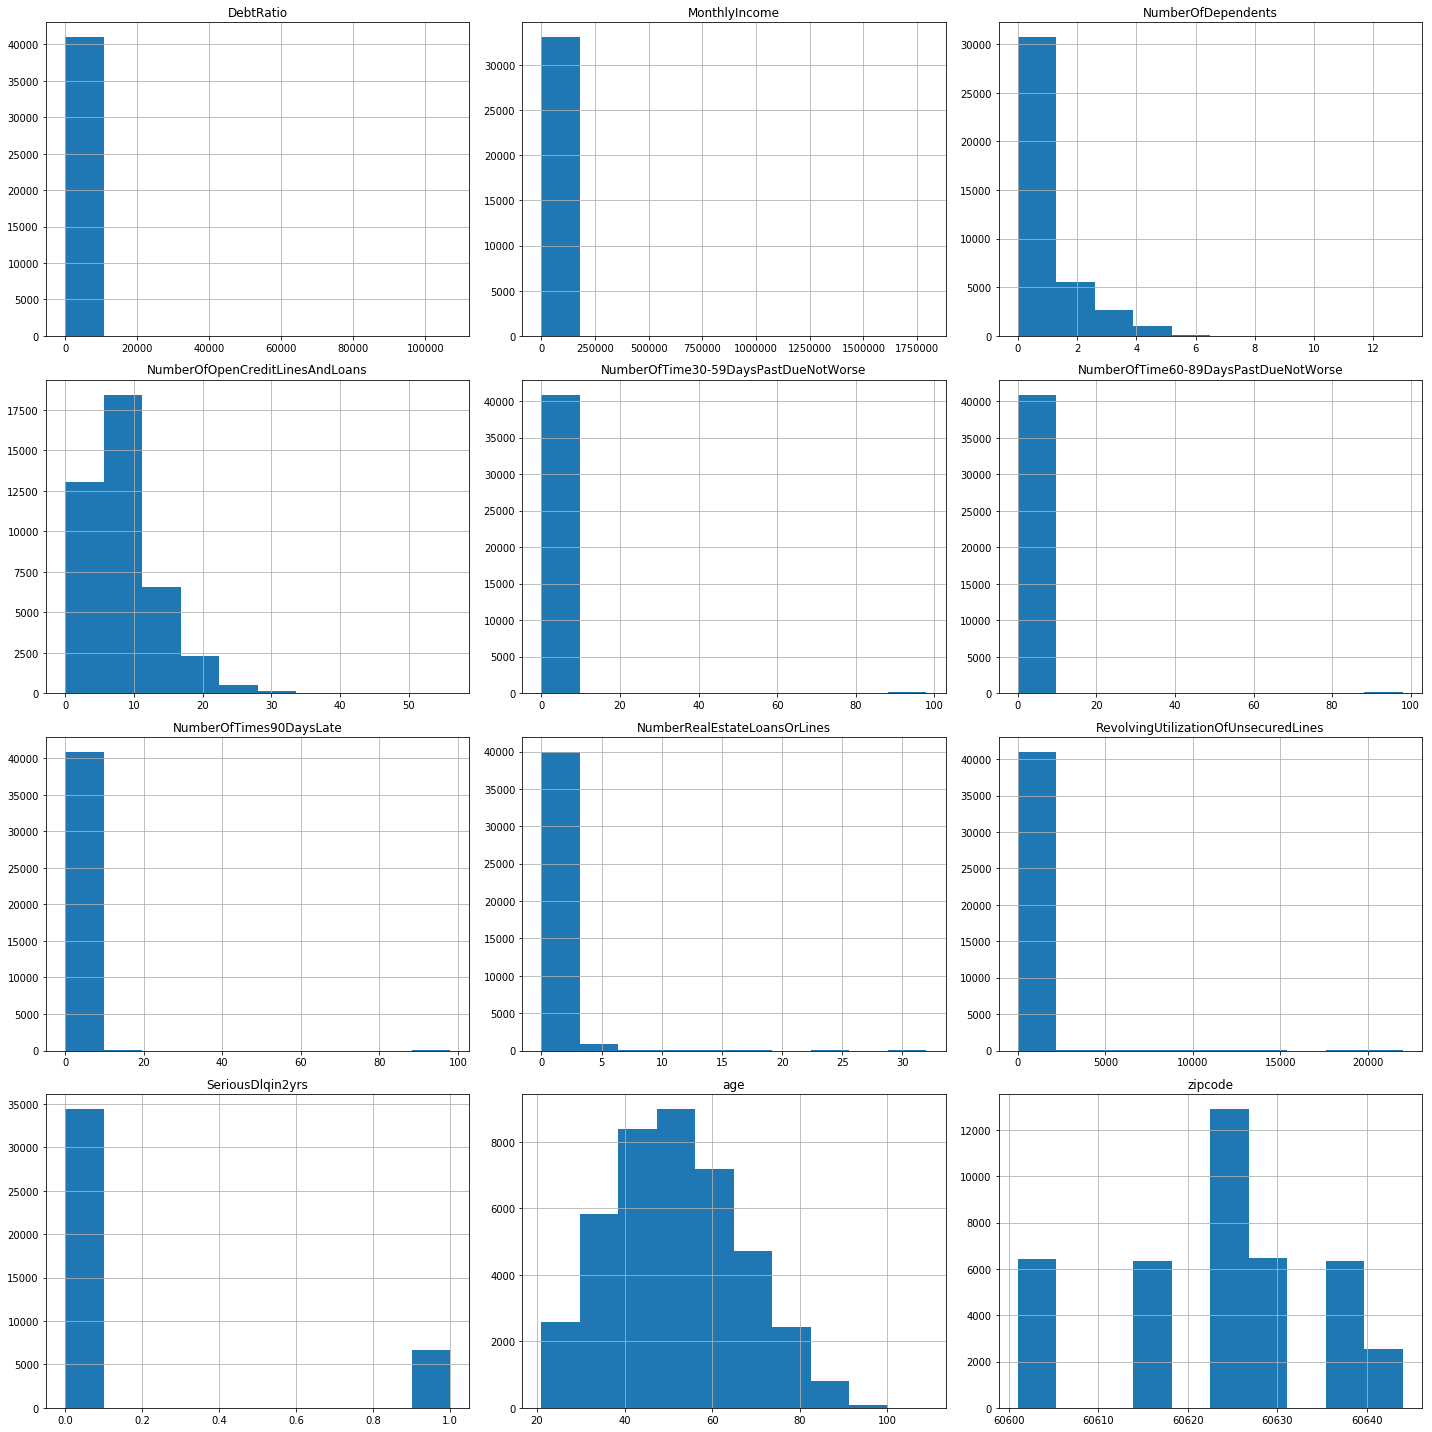

In [21]:
credit.hist(figsize=(20,20))
plt.tight_layout()
plt.show()

# *Pre-Process Data:*

In [73]:
def pre_process(dataframe):
    '''
    Fills missing values with the column median

    Inputs:
        dataframe

    Returns:
        None
    '''
    dataframe.fillna(dataframe.median(), inplace=True)

In [80]:
pre_process(credit)

In [78]:
credit.MonthlyIncome

PersonID
98976        (-0.001, 2983.0]
98991     (9000.0, 1794060.0]
99012        (2983.0, 4500.0]
99023     (9000.0, 1794060.0]
99027     (9000.0, 1794060.0]
99033     (9000.0, 1794060.0]
99044        (2983.0, 4500.0]
99048        (-0.001, 2983.0]
99056        (2983.0, 4500.0]
99058        (4500.0, 6200.0]
99062        (-0.001, 2983.0]
99104        (-0.001, 2983.0]
99105        (-0.001, 2983.0]
99145                     NaN
99147                     NaN
99176        (2983.0, 4500.0]
99193        (2983.0, 4500.0]
99200        (6200.0, 9000.0]
99206     (9000.0, 1794060.0]
99217        (2983.0, 4500.0]
99218        (6200.0, 9000.0]
99224        (4500.0, 6200.0]
99233     (9000.0, 1794060.0]
99238        (4500.0, 6200.0]
99246     (9000.0, 1794060.0]
99249        (6200.0, 9000.0]
99262        (-0.001, 2983.0]
99267                     NaN
99271        (-0.001, 2983.0]
99284        (4500.0, 6200.0]
                 ...         
123505                    NaN
123523                    NaN
1

# *Generate Features/Predictors:*

In [16]:
credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
PersonID,,,,,,,,,,,,
98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


In [63]:
def discretize(column, num_bins):
    '''
    Creates various sized bins to discretize a continuous variable
    based on quantile size.
    
    Inputs:
        column (series)
        num_bins (int)
    
    Returns:
        series
    '''
    return pd.qcut(column, num_bins)

In [64]:
def create_binary_vars(dataframe, column):
    '''
    Creates dummy variables from a categorical column
    
    Inputs:
        column (series)
    
    Returns:
        dataframe
    '''
    return pd.concat([dataframe, pd.get_dummies(dataframe[column])], axis=1)

In [81]:
credit.MonthlyIncome = discretize(credit['MonthlyIncome'], 5)

# *Build Classifier:*

In [97]:
def classify_model(features, target):
    '''
    Builds a logistic regression model.
    
    Inputs:
        features (dataframe)
        target (series)

    Returns:
        tuple of series
    '''
    X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.25,random_state=0)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    return y_test, y_pred

In [107]:
y, z = classify_model(credit[['age', 'DebtRatio', 'NumberOfDependents',
                             'zipcode', 'NumberOfOpenCreditLinesAndLoans',
                             'RevolvingUtilizationOfUnsecuredLines',
                             'NumberOfTimes90DaysLate', 'MonthlyIncome']], credit.SeriousDlqin2yrs)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

In [99]:
credit.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

# *Evaluate Classifier:*

In [105]:
def evaluate_classifier(y_test, y_pred):
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("Confusion Matrix: ", metrics.confusion_matrix(y_test, y_pred))

In [106]:
evaluate_classifier(y, z)

Accuracy: 0.8470840647552175
Precision: 0.8387096774193549
Recall: 0.016362492133417242
Confusion Matrix:  [[8660    5]
 [1563   26]]
